In [2]:
import xarray as xr
import cfgrib
import numpy as np 
import netCDF4
import matplotlib.pyplot as plt

In [18]:
for year in range(2010,2020,1):
    print("anno->", year)
    if(year == 2012 or year == 2016):
        print("bisestile")
        accumulator = np.full((3,8784,5,9), 136.0)
    else:
        accumulator = np.full((3,8760,5,9), 136.0)
        
    sum = 0
    for i in range(12): 
        if(i<9):
            era = "/home/faster/Documents/approximating_shefem/era5bits/download0"+str(i+1)+str(year)+".grib"
        else:
            era = "/home/faster/Documents/approximating_shefem/era5bits/download"+str(i+1)+str(year)+".grib"
        ds_grib_era = xr.open_dataset(era)
        ds_grib_era = ds_grib_era.sel(latitude=slice(46,44.94), longitude=slice(12,14))
        ds_array_era = ds_grib_era.to_array()
        ds_numpy_era = ds_array_era.to_numpy()
        accumulator[:,sum:sum+ds_numpy_era.shape[1],:,:] = ds_numpy_era
        print(ds_numpy_era.shape)
        sum = sum + ds_numpy_era.shape[1]
    
    print("hours-> ",sum)
    print("misses: ",np.count_nonzero(accumulator[0] == 136.0))
    np.save("era5_years/ERA5_adriatic_u10v10sp_" + str(year),accumulator)

anno-> 2010
(3, 744, 5, 9)
(3, 672, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
hours->  8760
misses:  0
anno-> 2011
(3, 744, 5, 9)
(3, 672, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
hours->  8760
misses:  0
anno-> 2012
bisestile
(3, 744, 5, 9)
(3, 696, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
hours->  8784
misses:  0
anno-> 2013
(3, 744, 5, 9)
(3, 672, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
hours->  8760
misses:  0
anno-> 2014
(3, 744, 5, 9)
(3, 672, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 7

Ignoring index file '/home/faster/Documents/approximating_shefem/era5bits/download042016.grib.923a8.idx' incompatible with GRIB file


(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
hours->  8784
misses:  0
anno-> 2017
(3, 744, 5, 9)
(3, 672, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
hours->  8760
misses:  0
anno-> 2018
(3, 744, 5, 9)
(3, 672, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
hours->  8760
misses:  0
anno-> 2019
(3, 744, 5, 9)
(3, 672, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
(3, 720, 5, 9)
(3, 744, 5, 9)
hours->  8760
misses:  0


## Merge Years

In [21]:
accumulator = np.full((3,78888,5,9), 136.0)
sum = 0 
for i in range(9):
    tmp = np.load("/home/faster/Documents/approximating_shefem/era5_years/ERA5_adriatic_u10v10sp_201"+str(i)+".npy")
    accumulator[:,sum:sum+tmp.shape[1],:,:] = tmp
    sum = sum + tmp.shape[1]
    print(sum)

8760
17520
26304
35064
43824
52584
61368
70128
78888


In [22]:
np.count_nonzero(accumulator[0] == 136.0)

0

In [23]:
accumulator.shape

(3, 78888, 5, 9)

In [24]:
np.save("ERA5_adriatic_u10v10sp_2010-2018",accumulator)

In [35]:
test = np.load("ERA5_adriatic_u10v10sp_2010-2018.npy")

In [37]:
#np.save("ERA5_adriatic_u10v10sp_2010-2018", test.astype(np.float32))

In [43]:
test[2].min()

89486.81

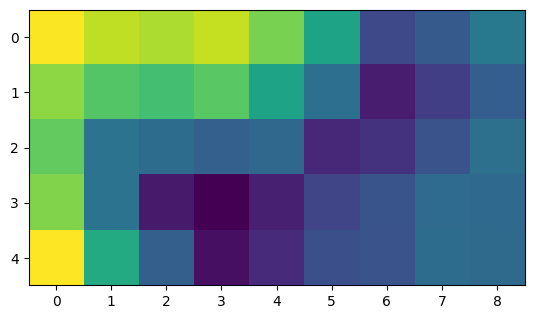

In [29]:
plt.imshow(test[0,100])

In [27]:
big = np.load("VHR-REA-reprojected_and_strict_cut_mslp-u10-v10_2010-2018.npy")

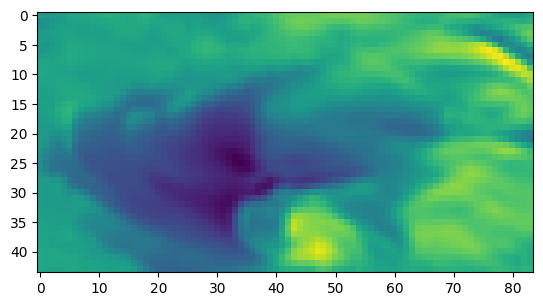

In [64]:
plt.imshow(big[0,100])